# Pandas Test - Real life Exercise

In [1]:
import pandas as pd

In [545]:
%pip install plotly_express

Note: you may need to restart the kernel to use updated packages.


In [548]:
! pip install cufflinks

     -------------------------------------- 81.7/81.7 kB 916.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68718 sha256=b298a212a1d6311b28b4af1902911204579f21385e786ea0f602dfa6062050ac
  Stored in directory: c:\users\cbs\appdata\local\pip\cache\wheels\29\b4\f8\2fd2206eeeba6ccad8167e4e8894b8c4ec27bf1342037fd136
Successfully built cufflinks


For visualizations:

In [546]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

ModuleNotFoundError: No module named 'cufflinks'

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [2]:
ad_df = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
282994,2022-week_01,AD00YMV8ZW,aPriori Technologies,US,yes,NaN,Qality,DNNQ
205694,2021-week_47,AD88088688,Fancy,GB,yes,NaN,Qality,DNNQ
276947,2022-week_01,AD09JKFH8G,Search Million Culture,GB,yes,NaN,Qality,DNNQ
226895,2021-week_48,AD0009EILA,Fancy,US,yes,NaN,Qality,DNNQ
102445,2021-week_40,AD08H8C88P,Search Million Culture,DE,yes,NaN,Qality,DNNQ


In [5]:
most_pop_ad = ad_df.ad_id.value_counts().idxmax()

#### q = f'ad_id == "{most_pop_ad}"'
q

In [6]:
ad_df.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [3]:
1#Add a column with the sample year

ad_df['Year']=ad_df.week_id.str[:4]
ad_df['Year'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: Year, dtype: object

In [ ]:
2#Add a column with the sample quarter (google how to)


In [4]:
ad_df.week_id.head()

0    2021-week_33
1    2021-week_33
2    2021-week_33
3    2021-week_33
4    2021-week_33
Name: week_id, dtype: object

In [5]:
ad_df['week']=ad_df.week_id.str[-2:]

In [6]:
ad_df['week'].head()

0    33
1    33
2    33
3    33
4    33
Name: week, dtype: object

In [7]:
ad_df['week'] = ad_df['week'].astype(int)

In [8]:
ad_df['qtr'] = ( (ad_df['week']-1)  // 13) + 1

In [9]:
ad_df.qtr.value_counts()

4    186900
3    100645
1     86243
Name: qtr, dtype: int64

In [10]:
ad_df.week_id.str[-2:]

0         33
1         33
2         33
3         33
4         33
          ..
373783    52
373784    52
373785    52
373786    52
373787    52
Name: week_id, Length: 373788, dtype: object

In [11]:
#Add a new success column with values 1 and 0 for yes and no

ad_df['new_succes']=(ad_df.is_success == 'yes').astype(int)


In [12]:
ad_df.new_succes.value_counts()

1    304206
0     69582
Name: new_succes, dtype: int64

In [13]:
#Are there any NaNs in the is_sever column?
#Count how many and create a new column with NaNs filled as False.
#Check that indeed the new column contaion no NaNs.

ad_df.is_sever.isnull().values.any()

ad_df.is_sever.isnull().sum()

304195

In [14]:
ad_df.is_sever.value_counts()

True     44689
False    24904
Name: is_sever, dtype: int64

In [15]:
ad_df['new_is_sever']=ad_df.is_sever.fillna("False").astype('bool')

In [16]:
ad_df.new_is_sever.value_counts()

True     348884
False     24904
Name: new_is_sever, dtype: int64

In [17]:
#Capitlize (first letter only) the is_success column (Inplace)
ad_df.is_success = ad_df.is_success.str.capitalize()

In [18]:
ad_df.is_success.value_counts()

Yes    304206
No      69582
Name: is_success, dtype: int64

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
1. How many **successful** requests are there in US region? 
1. How many **successful** requests are there in US region, on week 52?
1. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
1. How many requests where delivered by rule based providers? 
1. Select only the requests from 2021 - How many are there? 
1. Select the reqeusts from week 30 to week 40 - How many are there? 
1. Select all the data that comes from the most popular Ad
1. Select all the data that comes from the least popular provider
1. Select the data in which is_sever is None. How big is it? 
1. Select the data in which the requester is a 3 word company
1. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
1. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [19]:
ad_df.columns

Index(['week_id', 'ad_id', 'requester', 'region', 'is_success', 'is_sever',
       'recommendation_type', 'rec_provider', 'Year', 'week', 'qtr',
       'new_succes', 'new_is_sever'],
      dtype='object')

In [20]:
#How many requests are there in US region?
requests_grp=ad_df.groupby(['region'])

In [21]:
requests_grp['region'].value_counts().loc['US']

region
US    103846
Name: region, dtype: int64

In [ ]:
#How many successful requests are there in US region?

In [22]:
ad_df.is_success

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

In [23]:
filt=ad_df.is_success=='Yes'

In [24]:
temp=ad_df.loc[filt]


In [360]:
temp[temp.region=='US'].shape[0]

88918

In [25]:
# How many successful requests are there in US region, on week 52?
filt=(ad_df.is_success=='Yes') & (ad_df.week==52)
temp=ad_df.loc[filt]

In [26]:
temp[temp.region=='US'].shape[0]

3342

In [27]:
#How many requests where delivered by DNNQ, RNNY and UserPopQ together?

filt=(ad_df.rec_provider=='DNNQ') | (ad_df.rec_provider=='RNNY')| (ad_df.rec_provider=='UserPopQ')
temp=ad_df.loc[filt]

In [28]:
temp.shape[0]

200093

In [ ]:
#How many requests where delivered by rule based providers?

In [29]:
#Select only the requests from 2021 - How many are there?
filt=ad_df.Year=='2021'
temp=ad_df.loc[filt]

In [30]:
temp.shape[0]

271615

In [31]:
#Select the reqeusts from week 30 to week 40 - How many are there?
temp_df=ad_df.set_index('week')

In [32]:
temp_df.loc[33:40]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,qtr,new_succes,new_is_sever
week,,,,,,,,,,,,
33,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,True
33,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,3,1,True
33,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,True
33,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,3,1,True
33,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...
40,2021-week_40,AD07XH8N9W,Sensor Tower,US,Yes,NaN,Qality,DNNQ,2021,4,1,True
40,2021-week_40,AD097JK9F8,Extreme DA,US,Yes,NaN,Yield,RNNY,2021,4,1,True
40,2021-week_40,AD086WDR8S,Extreme DA,US,Yes,NaN,Yield,DNNY,2021,4,1,True


In [33]:
temp_df.loc[33:40].shape[0]

115051

In [34]:
ad_df.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,33,3,1,True
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True


In [35]:
#Select all the data that comes from the most popular Ad
requests_grp=ad_df.groupby(['ad_id'])

In [36]:
requests_grp['ad_id'].count().sort_values(ascending=False)


ad_id
AD07PFFMP9    247
AD098SWYF6    239
AD08C8RR8J    138
AD0886VY87     99
AD08888888     96
             ... 
AD07KR8PNY      1
AD07KR8QJ8      1
AD07KR8QSQ      1
AD07KR8QWZ      1
AD07ZFY86L      1
Name: ad_id, Length: 300727, dtype: int64

In [37]:
filt=ad_df.ad_id=='AD07PFFMP9'
ad_df.loc[filt]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,33,3,1,True
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,33,3,1,True
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,34,3,1,True
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,Yes,NaN,Yield,ManualQ,2021,34,3,1,True
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2021,35,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,True
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,True
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,True
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,Yes,NaN,Yield,ManualQ,2022,52,4,1,True


In [38]:
#Select all the data that comes from the least popular provider
requests_grp=ad_df.groupby(['rec_provider'])
requests_grp['rec_provider'].count().sort_values(ascending=True)

rec_provider
UserPopSelectionY        21
RuleBased               182
BooksQ                 1720
ManualY                1982
UserPopSelectionQ      2417
BooksY                 4150
XGBY                   4276
XGBQ                  12250
RNNY                  12732
ManualQ               13844
RNNQ                  20983
RuleBasedY            28154
UserPopY              38600
DNNY                  45116
UserPopQ              69937
DNNQ                 117424
Name: rec_provider, dtype: int64

In [39]:
filt=ad_df.rec_provider=='UserPopSelectionY'
ad_df.loc[filt].shape[0]

21

In [40]:
#Select the data in which is_sever is None. How big is it?
filt=ad_df['is_sever'].isna()
ad_df.loc[filt].shape[0]

304195

In [41]:
ad_df.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
195534,2021-week_46,AD098F8688,Puentes Company,IN,Yes,NaN,Yield,RuleBasedY,2021,46,4,1,True
347011,2022-week_06,AD078H88G8,Fancy,GB,No,True,Qality,UserPopQ,2022,6,1,0,True
104035,2021-week_40,AD008EHF8N,iDreamsky Technology,GB,Yes,NaN,Qality,DNNQ,2021,40,4,1,True
87572,2021-week_39,AD077MTMNF,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,39,3,1,True
23444,2021-week_34,AD08XM7WJX,RelayFoods,JP,Yes,NaN,Qality,UserPopQ,2021,34,3,1,True


In [42]:
ad_df['requester']

0         Search Million Culture
1          MoJoe Brewing Company
2         Search Million Culture
3         Search Million Culture
4         Search Million Culture
                   ...          
373783                Extreme DA
373784                     Fancy
373785                Extreme DA
373786                RelayFoods
373787             Tab Solutions
Name: requester, Length: 373788, dtype: object

In [43]:
#Select the data in which the requester is a 3 word company

filt=ad_df['requester'].str.split().apply(len)==3
ad_df.loc[filt].shape[0]

118141

In [44]:
#Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
filt= (ad_df['requester'].str.split().apply(len)==3) & (ad_df['ad_id'].str.contains("6") )
ad_df.loc[filt].shape[0]


24197

In [45]:
ad_df['ad_id'].head()

0     AD0088VOS
1    AD07KYS8JM
2    AD08PDP6Y9
3    AD89608808
4    AD07CMVHP6
Name: ad_id, dtype: object

In [46]:
#Select the data in which the requester is a 3 word company,
#and the multiplication of all the numbers in the ad_id is bigger than 30
def is_prod_bigger_than_30(ad_id):
    digits= [int(c) for c in ad_id if c.isdigit()]
    prod=1
    for d in digits:
        prod*=d
    return prod>30



In [47]:
# and Select the data in which the requester is a 3 word company
filt= (ad_df['requester'].str.split().apply(len)==3) & (ad_df.ad_id.apply(is_prod_bigger_than_30) )
ad_df.loc[filt]

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
37,2021-week_33,AD88898888,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
76,2021-week_33,AD88898786,MoJoe Brewing Company,DE,Yes,NaN,Yield,BooksY,2021,33,3,1,True
112,2021-week_33,AD88788887,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
162,2021-week_33,AD88887688,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
174,2021-week_33,AD88888876,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
360315,2022-week_52,AD89888888,MoJoe Brewing Company,GB,Yes,NaN,Yield,ManualQ,2022,52,4,1,True
362075,2022-week_52,AD88888997,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,52,4,1,True
362199,2022-week_52,AD88688888,Mission Street Manufacturing,GB,No,False,Qality,UserPopQ,2022,52,4,0,False
363286,2022-week_52,AD88887888,Search Million Culture,GB,Yes,NaN,Qality,UserPopQ,2022,52,4,1,True


In [52]:
ad_df.ad_id.apply(is_prod_bigger_than_30)

0         False
1         False
2         False
3         False
4         False
          ...  
373783    False
373784    False
373785    False
373786    False
373787    False
Name: ad_id, Length: 373788, dtype: bool

In [40]:
temp=ad_df['ad_id'].str.extract('(\d+)')


In [384]:
ad_df.date_range(start = '1', end = '52' ).difference(ad_df.index)

AttributeError: 'DataFrame' object has no attribute 'date_range'

In [385]:
#How many weeks available in the data? Are there any missing weeks?
ad_df.week.max()

52

In [386]:
ad_df.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,33,3,1,True
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True


In [390]:
dataFrame.index.min()

Timestamp('1970-01-01 00:00:00.000000001')

In [11]:
ad_df.week.shape[0]

373788

In [ ]:
range (ad_df.shape[0])

In [ ]:
for i in range (ad_df.week.shape[0]):
        ad_df['new'][i]= str(2021) + "-" + str(ad_df['week'][i]) + "-" + str(1)

In [21]:
def date_converter(x):
    return str(2021) + "-" + str(x) + "-" + "01"
        

In [22]:
date_converter(ad_df.week.iloc[0])

'2021-33-01'

In [23]:
ad_df['new']=ad_df.week.apply(lambda row: date_converter(row))

In [24]:
ad_df["Name"]= ad_df['Year'].str.cat(ad_df['week'], sep ="-")

In [28]:
ad_df.new.max()

'2021-52-01'

In [311]:
ad_df.new.head()

0    2021-08-16
1    2021-08-16
2    2021-08-16
3    2021-08-16
4    2021-08-16
Name: new, dtype: object

In [33]:
ad_df.new.head()

0    2021-33-01
1    2021-33-01
2    2021-33-01
3    2021-33-01
4    2021-33-01
Name: new, dtype: object

In [37]:
ad_df.set_index(['new'])

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,Name
new,,,,,,,,,,,
2021-33-01,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,2021-33
2021-33-01,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,2021,33,2021-33
2021-33-01,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,2021-33
2021-33-01,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,2021,33,2021-33
2021-33-01,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,2021,33,2021-33
...,...,...,...,...,...,...,...,...,...,...,...
2021-52-01,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,2022,52,2022-52
2021-52-01,2022-week_52,AD07C8XSMN,Fancy,US,yes,NaN,Qality,RNNQ,2022,52,2022-52
2021-52-01,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,2022,52,2022-52


In [38]:
k = pd.date_range(start="2021-01-01", end="2021-52-01").difference(ad_df.index)


ValueError: could not convert string to Timestamp

In [392]:
print(k)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)


In [57]:
def missing_numbers(num_list):
    missing = []
    for i in range(1,max(num_list)):
        if num_list.count(i) == 0:
            missing.append(i)
    return missing
            
    
unique_weeks = ad_df.week.unique().tolist()
print(unique_weeks)
sorted_weeks = sorted(unique_weeks)
print(sorted_weeks)
print(missing_numbers(sorted_weeks))

[33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 1, 2, 3, 4, 5, 6, 52]
[1, 2, 3, 4, 5, 6, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]
[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]


In [93]:
temp=ad_df.week.sort_values()

In [94]:
temp=ad_df.groupby(['region']).week.unique()

In [98]:
temp.index

Index(['DE', 'GB', 'IN', 'JP', 'US'], dtype='object', name='region')

In [73]:
unique_regions = ad_df.region.unique().tolist()

In [74]:
unique_regions

['DE', 'GB', 'IN', 'JP', 'US']

In [83]:
#How many regions available in the data? Are there any missing weeks per region?
unique_regions = ad_df.region.unique().tolist()
#print(unique_regions)
missing_weeks_per_region = [missing_numbers(row.tolist()) for row in ad_df.groupby("region").week.unique()]
print(missing_weeks_per_region)


[[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 51], [7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]]


In [87]:
df = pd.DataFrame(missing_weeks_per_region)

In [100]:
df.index=(['DE', 'GB', 'IN', 'JP', 'US'])

In [101]:
df.count(axis='columns')

DE    26
GB    26
IN    26
JP    27
US    26
dtype: int64

In [105]:
#How many ads are being sent to annotation in each region per week?
ad_df.groupby(['region','week','recommendation_type']).ad_id.count()


region  week  recommendation_type
DE      1     Qality                 2026
              Yield                   376
        2     Qality                 2027
              Yield                   367
        3     Qality                 1881
                                     ... 
US      50    Yield                  2126
        51    Qality                 1208
              Yield                  2788
        52    Qality                 1299
              Yield                  2699
Name: ad_id, Length: 258, dtype: int64

In [109]:
#How many None values are there in is_sever column?
ad_df["is_sever"].isnull().sum()

304195

In [ ]:
#Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week?

In [117]:
ad_df.pivot_table(columns=['ad_id'], aggfunc='size').sort_values( ascending=False)

ad_id
AD07PFFMP9    247
AD098SWYF6    239
AD08C8RR8J    138
AD0886VY87     99
AD08888888     96
             ... 
AD07KR8PNY      1
AD07KR8QJ8      1
AD07KR8QSQ      1
AD07KR8QWZ      1
AD07ZFY86L      1
Length: 300727, dtype: int64

In [121]:
grp_week.pivot_table(columns=['ad_id'], aggfunc='size').sort_values( ascending=False)

AttributeError: 'DataFrameGroupBy' object has no attribute 'pivot_table'

In [131]:
ads_per_week = ad_df.groupby(['week','ad_id'])['ad_id'].count().rename('num_ads').to_frame()
max_number = max(ads_per_week['num_ads'])
ads_per_week[ads_per_week['num_ads'] == max_number]

,,num_ads
week,ad_id,
40,AD098SWYF6,81


In [ ]:
#Are there ads that are being sent in more than one week?

In [146]:
c = ['ad_id', 'week']
temp=ad_df[ad_df.duplicated(c)].groupby(c).size().reset_index(name='Duplicates')

In [156]:
temp.query('Duplicates > 1')

,ad_id,week,Duplicates
5,AD000088DW,3,2
17,AD0000C78C,39,2
18,AD0000C78C,40,2
19,AD0000C78C,42,2
20,AD0000C78C,52,3
...,...,...,...
9141,AD88967096,3,2
9156,AD89888888,34,2
9160,AD89888888,42,2
9163,AD89888889,35,2


In [169]:
to_df_from_temp=temp.query('Duplicates > 1')

In [163]:
df1=pd.DataFrame(to_df_from_temp)

In [164]:
df1

,ad_id,week,Duplicates
5,AD000088DW,3,2
17,AD0000C78C,39,2
18,AD0000C78C,40,2
19,AD0000C78C,42,2
20,AD0000C78C,52,3
...,...,...,...
9141,AD88967096,3,2
9156,AD89888888,34,2
9160,AD89888888,42,2
9163,AD89888889,35,2


In [ ]:
#Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)

In [88]:
 grp=ad_df.groupby(['ad_id']

SyntaxError: unexpected EOF while parsing (2804640728.py, line 1)

In [ ]:
ad_df.groupby(['ad_id','week']).agg(lambda x: x.value_counts().index[0])

In [50]:
ad_df.head()

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever
0,2021-week_33,AD0088VOS,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,Yes,NaN,Yield,DNNY,2021,33,3,1,True
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True
3,2021-week_33,AD89608808,Search Million Culture,DE,Yes,NaN,Qality,BooksQ,2021,33,3,1,True
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,Yes,NaN,Qality,DNNQ,2021,33,3,1,True


In [58]:
#When is_sever is None, what is the number of successful requests?
#What is the number of non-successful requests?
filt=ad_df['is_sever'].isna()
df=ad_df.loc[filt]


In [57]:
df.is_success.value_counts()

Yes    304189
No          6
Name: is_success, dtype: int64

In [ ]:
#Per each region, What is the Quality/Yield traffic proportion WoW?

In [266]:
grp=ad_df.groupby(['region','recommendation_type']).size()

In [271]:
grp.groupby(level=0).apply(lambda x: 100*x/(x.sum()))

region  recommendation_type
DE      Qality                 80.890040
        Yield                  19.109960
GB      Qality                 83.634195
        Yield                  16.365805
IN      Qality                 49.128124
        Yield                  50.871876
JP      Qality                 85.206717
        Yield                  14.793283
US      Qality                 39.051095
        Yield                  60.948905
dtype: float64

In [202]:
#one more way
grp=ad_df.groupby(['region']).size()

In [205]:
df2 = pd.DataFrame(data=grp)

In [174]:
grp=ad_df.groupby(['region','recommendation_type'])['region'].count()
df = pd.DataFrame(data=grp)

In [191]:
df = pd.DataFrame(data=grp).unstack()

In [199]:
df

region       
recommendation_type Qality  Yield
region                           
DE                   50295  11882
GB                   69403  13581
IN                   40852  42302
JP                   35469   6158
US                   40553  63293

In [243]:
df3=df.join(df2)

C:\Users\CBS\AppData\Local\Temp\ipykernel_8752\4263962611.py:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (2 levels on the left, 1 on the right)
  df3=df.join(df2)


In [263]:
df3['Yield_prop']=(df3.iloc[:,1]/df3.iloc[:,2])

In [257]:
df3['Qality_prop']=df3.iloc[:,0]/df3.iloc[:,2]

In [291]:
df3

,"(region, Qality)","(region, Yield)",0,Yield_prop,Qality_prop
region,,,,,
DE,50295,11882,62177,0.191100,0.808900
GB,69403,13581,82984,0.163658,0.836342
IN,40852,42302,83154,0.508719,0.491281
JP,35469,6158,41627,0.147933,0.852067
US,40553,63293,103846,0.609489,0.390511


In [388]:
#How many different reqeusters are there?
ad_df.requester.unique().size

36

In [ ]:
#Which are the top 5 requesters per region?

In [393]:
ad_df.groupby(['region']).apply(lambda g:g.requester.value_counts().head(5))

region                        
DE      Search Million Culture    23657
        RelayFoods                17313
        MoJoe Brewing Company      8616
        iDreamsky Technology       3542
        SOLOMO365                  2435
GB      Search Million Culture    28002
        RelayFoods                15920
        Fancy                     13678
        MoJoe Brewing Company      9530
        iDreamsky Technology       3919
IN      Puentes Company           29427
        Search Million Culture    21365
        RelayFoods                17352
        MoJoe Brewing Company      7191
        iDreamsky Technology       1995
JP      RelayFoods                24574
        Search Million Culture     7906
        MoJoe Brewing Company      3549
        LocalVox Media             1724
        Tab Solutions              1366
US      Extreme DA                57215
        Fancy                     18668
        Tab Solutions              9790
        Search Million Culture     5610
        S

In [396]:
#Which are the different rec_proivders?
ad_df.rec_provider.unique().size

16

In [413]:
#12 Are there different rec providers per region?
ad_df.groupby([ 'region']).apply(lambda g:g.rec_provider.unique())

region
DE    [DNNQ, DNNY, BooksQ, UserPopQ, UserPopY, RuleB...
GB    [DNNY, XGBQ, DNNQ, XGBY, RNNQ, UserPopQ, Manua...
IN    [UserPopY, RuleBasedY, UserPopQ, ManualY, Manu...
JP    [ManualQ, UserPopQ, RuleBasedY, DNNQ, ManualY,...
US    [DNNY, ManualQ, DNNQ, UserPopY, XGBY, RNNY, Ma...
dtype: object

In [424]:
#13Are there different rec providers per rec type?
by_region = ad_df.groupby('region')['recommendation_type'].unique().to_frame()
by_region

,recommendation_type
region,
DE,"[Qality, Yield]"
GB,"[Yield, Qality]"
IN,"[Yield, Qality]"
JP,"[Qality, Yield]"
US,"[Yield, Qality]"


In [460]:
 df= ad_df.groupby('recommendation_type')['rec_provider'].unique().to_frame()

In [478]:
df.loc['Qality'].any()==df.loc['Yield'].any()

ValueError: setting an array element with a sequence.

In [495]:
ad_df.groupby(["region"]).is_success.str.count("yes").sum()

AttributeError: 'SeriesGroupBy' object has no attribute 'str'

In [502]:
ad_df.is_success

0         Yes
1         Yes
2         Yes
3         Yes
4         Yes
         ... 
373783    Yes
373784    Yes
373785    Yes
373786    Yes
373787    Yes
Name: is_success, Length: 373788, dtype: object

In [503]:
ad_df['is_succes_int']=(ad_df.is_success=='Yes').astype(int)

In [504]:
ad_df['is_succes_int'].value_counts()

1    304206
0     69582
Name: is_succes_int, dtype: int64

In [508]:
ad_df.groupby(["region"]).is_succes_int.sum()/ad_df.groupby(["region"]).count()

,DE,GB,IN,JP,US,Year,ad_id,is_sever,is_succes_int,is_success,new_is_sever,new_succes,qtr,rec_provider,recommendation_type,requester,week,week_id
region,,,,,,,,,,,,,,,,,,
DE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
IN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
US,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [509]:
ad_df.groupby(["region"]).count()

,week_id,ad_id,requester,is_success,is_sever,recommendation_type,rec_provider,Year,week,qtr,new_succes,new_is_sever,is_succes_int
region,,,,,,,,,,,,,
DE,62177,62177,62177,62177,11556,62177,62177,62177,62177,62177,62177,62177,62177
GB,82984,82984,82984,82984,13476,82984,82984,82984,82984,82984,82984,82984,82984
IN,83154,83154,83154,83154,19805,83154,83154,83154,83154,83154,83154,83154,83154
JP,41627,41627,41627,41627,9827,41627,41627,41627,41627,41627,41627,41627,41627
US,103846,103846,103846,103846,14929,103846,103846,103846,103846,103846,103846,103846,103846


In [514]:
def calc_success_rate(group):
    data = []
    #print((group.is_sucess_int.sum()/group.count()).week_id)
    
    success_rate = (group.is_succes_int.sum()/group.count().week_id)
    data.append((group.is_succes_int.sum(), success_rate))
    df = pd.DataFrame(data, columns = ['success_count', 'success_rate'])        
    df = df.sort_values(by='success_rate', ascending=False)
    return df


success_rate = ad_df.groupby(["region"]).apply(calc_success_rate)
success_rate.sort_values(by="success_rate", ascending = False).head(1)

,,success_count,success_rate
region,,,
US,0,88918,0.856249


In [526]:
def calc_success_rate_by_provider(group):
    data = []
    for provider in group.rec_provider.unique():
        provider_data = group[group.rec_provider == provider] 
        #print((group.is_sucess_int.sum()/group.count()).week_id)
        success_rate = (provider_data.is_succes_int.sum()/provider_data.count()).week_id
        data.append((provider, provider_data.is_succes_int.sum(), success_rate))
        
    df = pd.DataFrame(data, columns = ['provider', 'success_count', 'success_rate'])        
    df = df.sort_values(by='success_rate', ascending=False).head(1)
    return df

In [527]:
success_rate = ad_df.groupby(["region"]).apply(calc_success_rate_by_provider)
success_rate

,,provider,success_count,success_rate
region,,,,
DE,8,BooksY,1215,0.966587
GB,11,RuleBased,39,0.975000
IN,4,ManualQ,5041,0.952390
JP,0,ManualQ,651,0.934003
US,11,BooksY,2851,0.985482


In [ ]:
#Present a table with a success rate, sever defects rate and CI (for each metric) per region


1. How many weeks available in the data? Are there any missing weeks? 
1. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

In [532]:
ad_df['is_sucess_int']=ad_df.is_succes_int

In [536]:
ad_df["is_sever_no_nan"] = ad_df["is_sever"].fillna("False")

In [537]:
#17
import math

def calc_success_and_sever_rate(group):
    data = []    
    success_rate = (group.is_sucess_int.sum()/group.week_id.count())
    sever_rate = (group[group.is_sever_no_nan == True].count()/group[group.is_sever.isna() == False].count()).is_sever_no_nan
    success_mean = group.is_sucess_int.mean()
    success_std = group.is_sucess_int.std()
    success_ci95_hi = success_mean + 1.96*success_std/math.sqrt(group.is_sucess_int.count())
    success_ci95_lo = success_mean - 1.96*success_std/math.sqrt(group.is_sucess_int.count())
    
    sever_no_nan_int =  [int(item == True) for item in  group[group.is_sever.isna() == False]]
    sever_mean = group[group.is_sever.isna() == False]['is_sever'].mean()
    sever_std = group[group.is_sever.isna() == False]['is_sever'].std()
    count = group[group.is_sever.isna() == False].is_sever.count()
    sever_ci95_hi = sever_mean + 1.96*sever_std/math.sqrt(count)
    sever_ci95_lo = sever_mean - 1.96*sever_std/math.sqrt(count)

    data.append((sever_rate, sever_ci95_hi, sever_ci95_lo, success_rate, success_ci95_hi, success_ci95_lo))
    df = pd.DataFrame(data, columns = ['sever_rate', 'sever_rate_ci95_high', 'sever_rate_ci95_lo', 'success_rate', 'success_rate_ci95_high', 'success_rate_ci95_low'])        
    return df

In [538]:
ad_recs_with_rates_per_region = ad_df.groupby(["region"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_region

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
region,,,,,,,
DE,0,0.611198,0.620086,0.602309,0.814192,0.817249,0.811134
GB,0,0.736791,0.744227,0.729356,0.837619,0.840129,0.835110
IN,0,0.592578,0.599421,0.585734,0.761900,0.764795,0.759005
JP,0,0.657067,0.666453,0.647681,0.763927,0.768007,0.759848
US,0,0.636613,0.644329,0.628898,0.856249,0.858383,0.854115


In [540]:
#18
ad_recs_with_rates_per_provider = ad_df.groupby(["rec_provider"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_provider

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
rec_provider,,,,,,,
BooksQ,0,0.099644,0.134728,0.064560,0.836628,0.854105,0.819151
BooksY,0,0.261905,0.356495,0.167315,0.979759,0.984044,0.975474
DNNQ,0,0.840548,0.846112,0.834984,0.858376,0.860371,0.856382
DNNY,0,0.756556,0.768324,0.744788,0.886714,0.889639,0.883790
ManualQ,0,0.526154,0.564570,0.487738,0.953193,0.956711,0.949674
ManualY,0,0.529412,0.601144,0.457679,0.905651,0.918523,0.892778
RNNQ,0,0.755501,0.774134,0.736869,0.902540,0.906553,0.898527
RNNY,0,0.621094,0.650822,0.591366,0.919651,0.924373,0.914929
RuleBased,0,1.000000,1.000000,1.000000,0.967033,0.993045,0.941021


In [ ]:
#19
#Present a table with a success rate, sever defects rate and CI
#(for each metric) per region and rec provider combinations



In [541]:
ad_recs_with_rates_per_region_provider = ad_df.groupby(["rec_provider", "region"]).apply(calc_success_and_sever_rate)
ad_recs_with_rates_per_region_provider

sever_rate  sever_rate_ci95_high  \
rec_provider      region                                       
BooksQ            DE     0    0.095941              0.131071   
                  US     0    0.200000              0.461333   
BooksY            DE     0    0.238095              0.368469   
                  US     0    0.285714              0.423996   
DNNQ              DE     0    0.763410              0.774940   
                  GB     0    0.869017              0.878376   
                  JP     0    0.900269              0.909062   
                  US     0    0.837506              0.853855   
DNNY              DE     0    0.604027              0.649416   
                  GB     0    0.784124              0.809226   
                  JP     0    0.699219              0.731674   
                  US     0    0.785814              0.800847   
ManualQ           DE     0    0.335714              0.414222   
                  GB     0    0.652778              0.763520   
                  IN     0    0.492063              0.553913   
                  JP     0    0.543478              0.689015   
                  US     0    0.707143              0.782797   
ManualY           DE     0    1.000000              1.000000   
                  GB     0    0.657143              0.769143   
                  IN     0    0.000000              0.000000   
                  JP     0    0.228070              0.337967   
                  US     0    0.695652              0.887929   
RNNQ              GB     0    0.757774              0.781806   
                  US     0    0.752126              0.781644   
RNNY              GB     0    0.671717              0.737292   
                  US     0    0.608959              0.642258   
RuleBased         GB     0    1.000000                   NaN   
                  IN     0    1.000000                   NaN   
                  US     0    1.000000              1.000000   
RuleBasedY        DE     0    0.292724              0.329440   
                  GB     0    0.817708              0.840013   
                  IN     0    0.608878              0.622081   
                  JP     0    0.326241              0.370973   
                  US     0    0.406401              0.420655   
UserPopQ          DE     0    0.498285              0.513626   
                  GB     0    0.530392              0.551153   
                  IN     0    0.459197              0.470244   
                  JP     0    0.423129              0.440991   
                  US     0    0.574790              0.614547   
UserPopSelectionQ JP     0    0.601790              0.647222   
UserPopSelectionY JP     0    0.333333              0.986667   
UserPopY          DE     0    0.668471              0.702436   
                  GB     0    0.760714              0.796083   
                  IN     0    0.745519              0.756132   
                  JP     0    0.312775              0.347622   
                  US     0    0.741059              0.759812   
XGBQ              GB     0    0.540912              0.563806   
                  US     0    0.550265              0.591248   
XGBY              GB     0    0.721805              0.798250   
                  US     0    0.710214              0.753601   

                            sever_rate_ci95_lo  success_rate  \
rec_provider      region                                       
BooksQ            DE     0            0.060811      0.799704   
                  US     0           -0.061333      0.972752   
BooksY            DE     0            0.107722      0.966587   
                  US     0            0.147432      0.985482   
DNNQ              DE     0            0.751880      0.839114   
                  GB     0            0.859657      0.874127   
                  JP     0            0.891476      0.818467   
                  US     0            0.821158      0.905650   
DNNY              DE     0            0.558638      0.91729

In [542]:
#20Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
ad_recs_per_recommendation_type = ad_df.groupby(["recommendation_type"]).apply(calc_success_and_sever_rate)
ad_recs_per_recommendation_type

,,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
recommendation_type,,,,,,,
Qality,0,0.645755,0.650441,0.641068,0.830910,0.832420,0.829399
Yield,0,0.637270,0.642749,0.631791,0.784427,0.786603,0.782252


In [543]:
#21
#Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
ad_recs_per_recommendation_type_region =     ad_df.groupby(["recommendation_type","region"]).apply(calc_success_and_sever_rate)
ad_recs_per_recommendation_type_region

sever_rate  sever_rate_ci95_high  \
recommendation_type region                                       
Qality              DE     0    0.628187              0.637791   
                    GB     0    0.723666              0.732267   
                    IN     0    0.458965              0.469940   
                    JP     0    0.704643              0.714716   
                    US     0    0.737845              0.751321   
Yield               DE     0    0.520788              0.543695   
                    GB     0    0.780906              0.795493   
                    IN     0    0.681615              0.689991   
                    JP     0    0.464267              0.486437   
                    US     0    0.598376              0.607607   

                              sever_rate_ci95_lo  success_rate  \
recommendation_type region                                       
Qality              DE     0            0.618582      0.806681   
                    GB     0            0.715066      0.850367   
                    IN     0            0.447989      0.806129   
                    JP     0            0.694571      0.777806   
                    US     0            0.724369      0.899070   
Yield               DE     0            0.497880      0.845986   
                    GB     0            0.766319      0.772476   
                    IN     0            0.673240      0.719186   
                    JP     0            0.442097      0.683988   
                    US     0            0.589145      0.828812   

                              success_rate_ci95_high  success_rate_ci95_low  
recommendation_type region                                                   
Qality              DE     0                0.810132               0.803229  
                    GB     0                0.853021               0.847713  
                    IN     0                0.809963               0.802296  
                    JP     0                0.782132               0.773479  
                    US     0                0.902002               0.896138  
Yield               DE     0                0.852476               0.839495  
                    GB     0                0.779527               0.765425  
                    IN     0                0.723468               0.714903  
                    JP     0                0.695601               0.672375  
                    US     0                0.831747               0.825877

In [550]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

,region,level_1,sever_rate,sever_rate_ci95_high,sever_rate_ci95_lo,success_rate,success_rate_ci95_high,success_rate_ci95_low
0,DE,0,0.611198,0.620086,0.602309,0.814192,0.817249,0.811134
1,GB,0,0.736791,0.744227,0.729356,0.837619,0.840129,0.835110
2,IN,0,0.592578,0.599421,0.585734,0.761900,0.764795,0.759005
3,JP,0,0.657067,0.666453,0.647681,0.763927,0.768007,0.759848
4,US,0,0.636613,0.644329,0.628898,0.856249,0.858383,0.854115


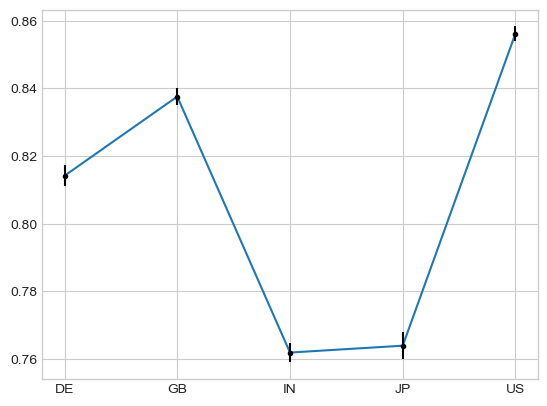

In [551]:
#22 Present WoW table/graph with success rate and CI (see image below) per region
fig = plt.figure()
ax = plt.axes()
ad_recs_with_rates_per_region2 = ad_recs_with_rates_per_region.reset_index()
ax.plot( ad_recs_with_rates_per_region2.region,ad_recs_with_rates_per_region2.success_rate);
plt.errorbar(ad_recs_with_rates_per_region2.region, ad_recs_with_rates_per_region2.success_rate, yerr=ad_recs_with_rates_per_region2.success_rate_ci95_high - ad_recs_with_rates_per_region2.success_rate, fmt='.k');
ad_recs_with_rates_per_region2

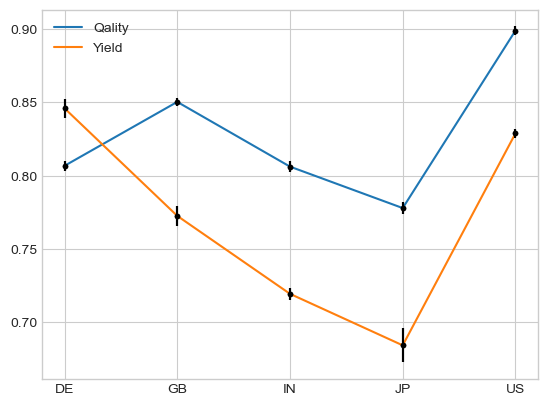

In [555]:
#23Present WoW table/graph with success rate and CI (see image below) per region and rec type
fig = plt.figure()

ad_recs_per_recommendation_type_region2 = ad_recs_per_recommendation_type_region.reset_index()

for rec in ad_recs_per_recommendation_type_region2.recommendation_type.unique():
    by_recommendation = ad_recs_per_recommendation_type_region2[ad_recs_per_recommendation_type_region2["recommendation_type"] == rec];
    plt.plot(by_recommendation.region, by_recommendation.success_rate, label = rec);
    plt.legend()
    plt.errorbar(ad_recs_per_recommendation_type_region2.region, ad_recs_per_recommendation_type_region2.success_rate, yerr=ad_recs_per_recommendation_type_region2.success_rate_ci95_high - ad_recs_per_recommendation_type_region2.success_rate, fmt='.k');


                       sever_rate  sever_rate_ci95_high  sever_rate_ci95_lo  \
rec_provider region                                                           
BooksQ       DE     0    0.095941              0.131071            0.060811   
             US     0    0.200000              0.461333           -0.061333   
BooksY       DE     0    0.238095              0.368469            0.107722   
             US     0    0.285714              0.423996            0.147432   
DNNQ         DE     0    0.763410              0.774940            0.751880   

                       success_rate  success_rate_ci95_high  \
rec_provider region                                           
BooksQ       DE     0      0.799704                0.821038   
             US     0      0.972752                0.989432   
BooksY       DE     0      0.966587                0.976526   
             US     0      0.985482                0.989842   
DNNQ         DE     0      0.839114                0.843113   

    

Text(0, 0.5, 'Success rate')

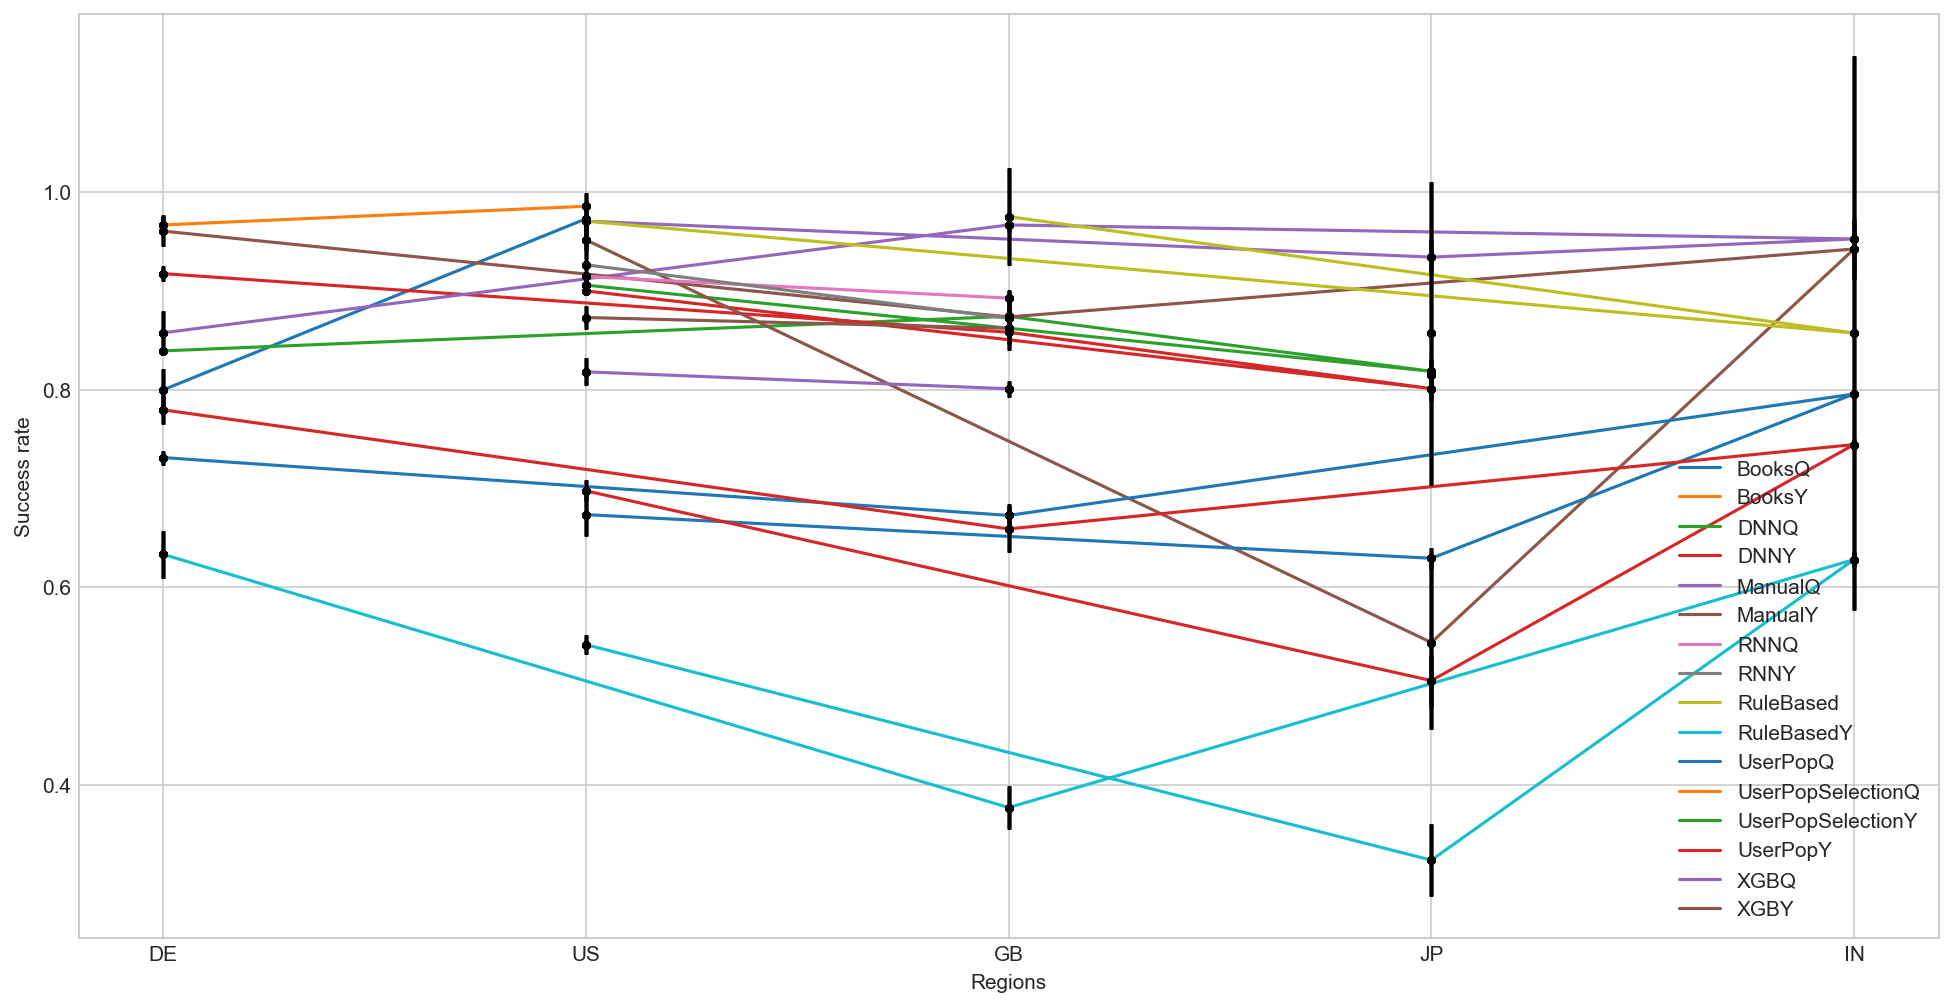

In [556]:
#24
# Present WoW table/graph with success rate and CI (see image below) per region and rec provider
print(ad_recs_with_rates_per_region_provider.head())
ad_recs_with_rates_per_region_provider2 = ad_recs_with_rates_per_region_provider.reset_index()
fig = plt.figure(figsize=(16, 8), dpi=150)
ax = plt.axes()
for provider in ad_recs_with_rates_per_region_provider2.rec_provider.unique():
    by_provider = ad_recs_with_rates_per_region_provider2[ad_recs_with_rates_per_region_provider2["rec_provider"] == provider];
    plt.plot(by_provider.region, by_provider.success_rate, label = provider);
    plt.legend()
    plt.errorbar(ad_recs_with_rates_per_region_provider2.region, ad_recs_with_rates_per_region_provider2.success_rate, yerr=ad_recs_with_rates_per_region_provider2.success_rate_ci95_high - ad_recs_with_rates_per_region_provider2.success_rate, fmt='.k');

plt.xlabel('Regions')
plt.ylabel('Success rate')

### Compactization

* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [528]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

NameError: name 'week1' is not defined

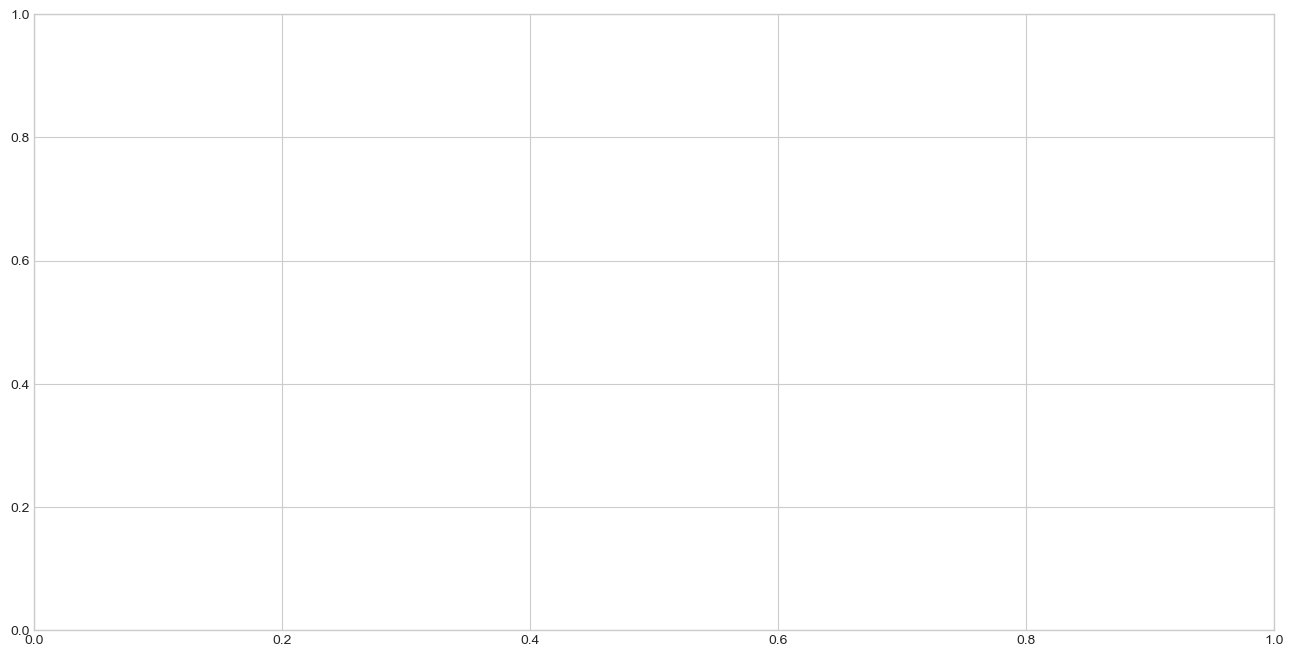

In [558]:

ad_recs_with_rates_per_region_week = ad_df.groupby(["week_id", "region"]).apply(calc_success_and_sever_rate)

ad_recs_with_rates_per_region_week = ad_recs_with_rates_per_region_week.reset_index()
fig = plt.figure(figsize=(16, 8), dpi=100)
ax = plt.axes()
for region in ad_recs_with_rates_per_region_week.region.unique():
    by_week = ad_recs_with_rates_per_region_week[ad_recs_with_rates_per_region_week["region"] == region];
    plt.plot(by_week.week_id, by_week.success_rate, label = week);
    plt.legend()
    plt.errorbar(ad_recs_with_rates_per_region_week.week_id, ad_recs_with_rates_per_region_week.success_rate, yerr=ad_recs_with_rates_per_region_week.success_rate_ci95_high - ad_recs_with_rates_per_region_week.success_rate, fmt='.k');

plt.xlabel('Week id')
plt.ylabel('Success rate')
plt.title('Success rate per region')

Produce the following requestser proportion graph:

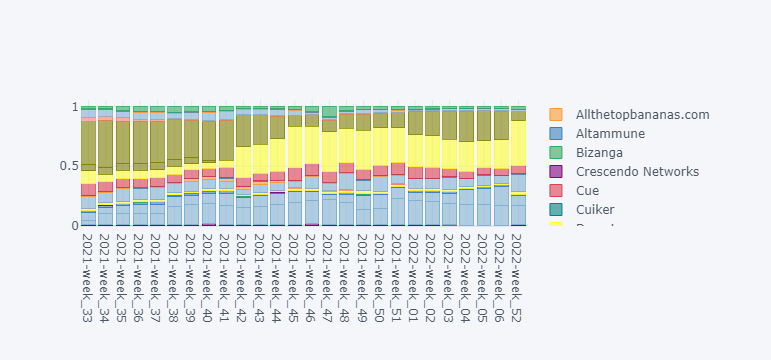

## Appendix

Code to create weekly files:

In [67]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)